<div style="padding:10px;
            color:black;
            margin:10px;
            font-size:170%;
            display:fill;
            border-radius:1px;
            border-style: solid;
            border-color:#f17d8e;
            background-color:#f6abb6;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Table of Contents</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="#1" style="color:black">1 - Imports</a>
        </li>
        <li>
            <a href="#2" style="color:black">2 - Data Analysis</a>
        </li>
        <li>
            <a href="#3" style="color:black">3 - Data Preprocessing</a>
        </li>
        <li>
            <a href="#4" style="color:black">4 - Model Evaluation</a>
            <ul>
                <li>
                    <a href="#4-1" style="color:black">4.1 - Logistic Regression</a>
                </li>
                <li>
                    <a href="#4-2" style="color:black">4.2 - DecisionTree</a>
                </li>
                <li>
                    <a href="#4-3" style="color:black">4.3 - KNearestNeighbors</a>
                </li>
                <li>
                    <a href="#4-4" style="color:black">4.4 - RandomForestClassifier</a>
                </li>
                <li>
                    <a href="#4-5" style="color:black">4.5 - XGBoost</a>
                </li>
                <li>
                    <a href="#4-6" style="color:black">4.6 - Naive Bayes</a>
                </li>
                <li>
                    <a href="#4-7" style="color:black">4.7 - Neural Network</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#5" style="color:black">5 - Trying all features</a>
        </li>
        <li>
            <a href="#6" style="color:black">6 - Evaluation</a>
        </li>
        <li>
            <a href="#7" style="color:black">7 - Conclusion</a>
        </li>
        <li>
            <a href="#8" style="color:black">8 - Thank You</a>
        </li>
    </ul>
</div>
<a id="1"></a>

<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Imports</center></h1>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import xgboost as xgb
import plotly.express as px

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Analysis</center></h1>
    
# Data Analysis

In [ ]:
df = pd.read_csv('data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [ ]:
fig = px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
df.shape

(569, 33)

### From these plots we conclude that:

* **There is a significant class imbalance, with the number of malignant cases being considerably lower than the number of benign cases we need to consider alternative evaluation metrics, beyond accuracy, when developing classification models on this data.**



In [ ]:
fig = px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

### From these plots we conclude that:

* **There is a significant difference between the distributions of malignant and benign cases for parameters such as perimeter mean, area mean, and radius mean. Malignant cases appear to exhibit a wider range of values in these parameters than benign**

* **texture_mean and smoothness_mean exhibit less noticeable differences in the distribution of values between malignant and benign cases.**



In [ ]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [ ]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [ ]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Preprocessing</center></h1>
    
# Data Preprocessing

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Get highly correlated features with the target**

**As mentioned in this [notebook](https://www.kaggle.com/code/fareselmenshawii/introduction-to-feature-selection) Selecting highly correlated features gives better results**

In [ ]:
corr = df.corr()

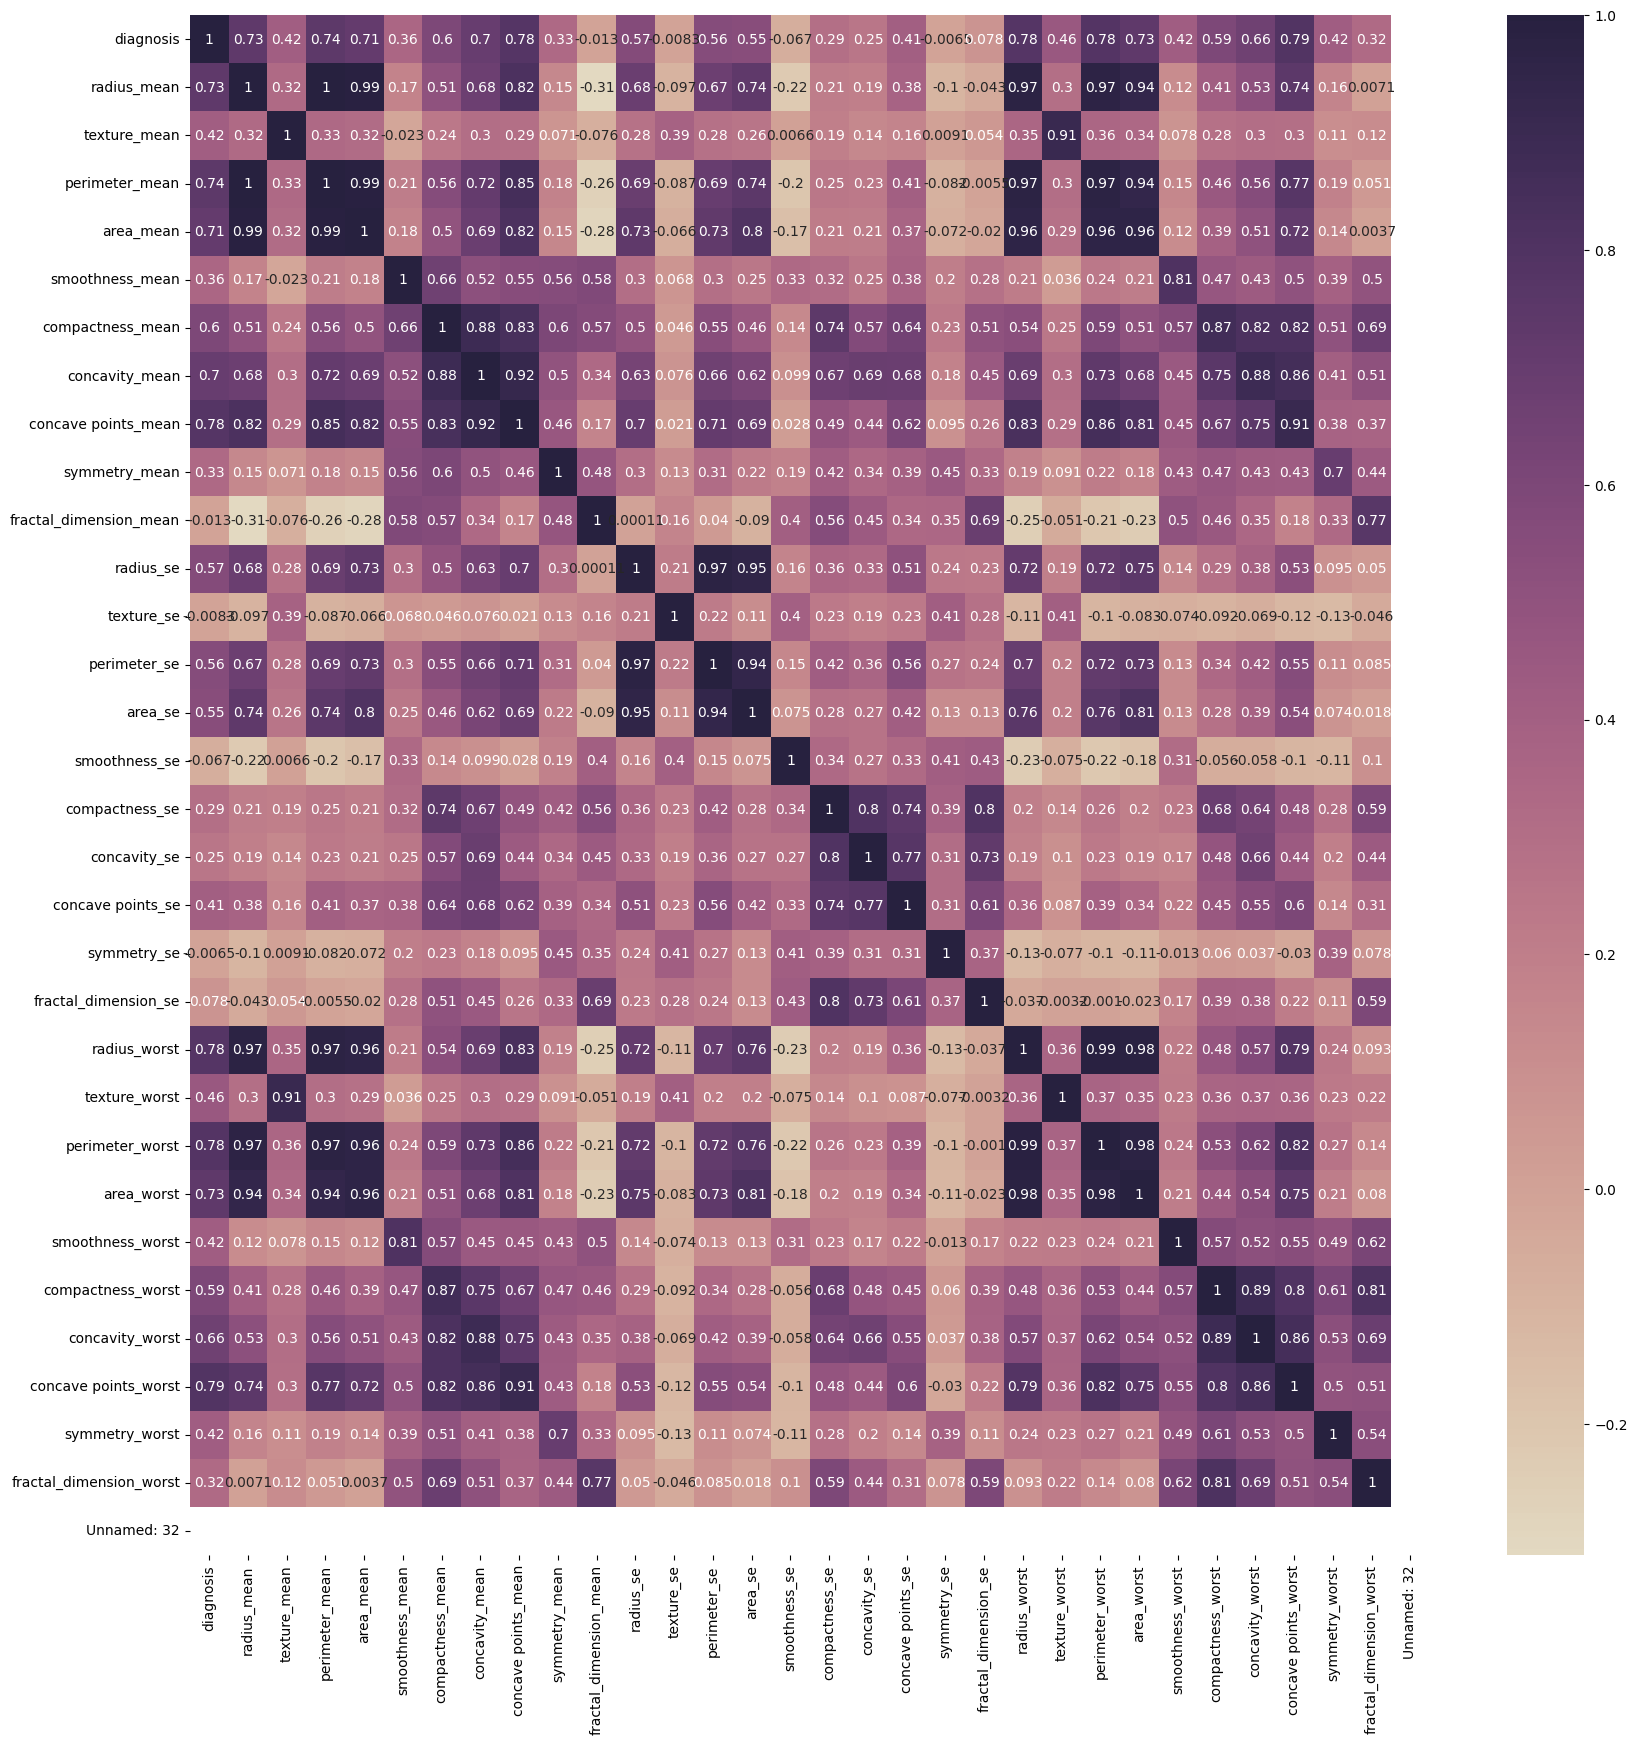

Highly correlated features with 'diagnosis': ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'diagnosis' is the target column
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), annot=True)
plt.show()

# Get the absolute value of correlation with the target variable
cor_target = abs(corr["diagnosis"])

# Select features with correlation greater than 0.2
relevant_features = cor_target[cor_target > 0.2]

# Collect feature names excluding the target variable itself
names = [index for index, value in relevant_features.items() if index != 'diagnosis']

print("Highly correlated features with 'diagnosis':", names)


**Define data and labels**

In [ ]:
X = df[names]
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

<a id="4"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Model Evaluation</center></h1>
    
# Model Evaluation

**Now let's start Modeling**

**We'll start by defining a function to help us iterate faster**

In [ ]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''

    model.fit(X_train, y_train)  #fit the model instance


    predictions = model.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

<a name="4-1"></a>
## Logistic Regression


In [ ]:
lg = LogisticRegression()

results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
results.index = ['LogisticRegression']

In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074


<a name="4-2"></a>
## Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree, X_train, y_train, X_test, y_test)

# Set the index
decision_tree_results.index = ['DecisionTree']

# Concatenate the new results to the existing results
results = pd.concat([results, decision_tree_results])


In [40]:
# Ensure seaborn is imported
import seaborn as sns

# Step 1: Reset index to ensure uniqueness
results = results.reset_index(drop=True)

# Step 2: Remove or rename duplicate columns if any
if results.columns.duplicated().any():
    # Optionally rename duplicate columns
    new_columns = []
    seen = {}
    for col in results.columns:
        if col in seen:
            seen[col] += 1
            new_columns.append(f"{col}_{seen[col]}")
        else:
            seen[col] = 0
            new_columns.append(col)
    results.columns = new_columns

# Step 3: Apply background gradient style
styled_results = results.sort_values(by='f1_score', ascending=False)\
                        .style.background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

# Display styled DataFrame (in Jupyter or IPython environment)
styled_results


,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.964912,0.952381,0.975610,0.930233,0.958074
2,0.921053,0.898876,0.869565,0.930233,0.922863
1,0.912281,0.886364,0.866667,0.906977,0.911235


<a name="4-3"></a>
## KNearestNeighbors

In [41]:
KNN = KNeighborsClassifier(n_neighbors=12)


In [43]:
knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index = ['KNearsNeighbors']

# Use pd.concat instead of append
results = pd.concat([results, knn])


In [44]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
0,0.964912,0.952381,0.975610,0.930233,0.958074
2,0.921053,0.898876,0.869565,0.930233,0.922863
1,0.912281,0.886364,0.866667,0.906977,0.911235


<a name="4-4"></a>
## RandomForestClassifer

In [46]:
rfc = RandomForestClassifier()

In [48]:
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

# Fix: Use pd.concat instead of append
results = pd.concat([results, rfc_result])


In [49]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
0,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
2,0.921053,0.898876,0.869565,0.930233,0.922863
1,0.912281,0.886364,0.866667,0.906977,0.911235


<a name="4-5"></a>
## XGBoost

In [51]:
# Import xgboost if you haven't already
import xgboost as xgb

# Initialize and evaluate the model
xgboost_model = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost_model, X_train, y_train, X_test, y_test)
xgboost_result.index = ['XGBoost']

# Append to results using pd.concat
results = pd.concat([results, xgboost_result])


In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


<a name="4-6"></a>
## Naive Bayes

In [53]:
# Make sure GaussianNB is imported
from sklearn.naive_bayes import GaussianNB

# Initialize and evaluate the model
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

# Fix: Use pd.concat instead of .append
results = pd.concat([results, Naive_Bayes_result])


In [54]:
results.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
0,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
2,0.921053,0.898876,0.869565,0.930233,0.922863
1,0.912281,0.886364,0.866667,0.906977,0.911235


<a name="4-7"></a>
## Neural Network

In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 50:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Define model
inputs = Input(shape=(X.shape[-1],))  # Input shape
x = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(seed=0))(inputs)
x = Dropout(0.4)(x)

x = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(seed=0))(x)
x = Dropout(0.4)(x)

x = Dense(25, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(seed=0))(x)
x = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.RandomNormal(seed=0))(x)

model = Model(inputs=inputs, outputs=x)

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=140, callbacks=[callback])

# Predict
predictions = model.predict(X_test)


Epoch 1/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4446 - loss: 0.7071 - learning_rate: 0.0010
Epoch 2/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4337 - loss: 0.6891 - learning_rate: 0.0010
Epoch 3/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4678 - loss: 0.6614 - learning_rate: 0.0010
Epoch 4/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5136 - loss: 0.6589 - learning_rate: 0.0010
Epoch 5/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5960 - loss: 0.6353 - learning_rate: 0.0010
Epoch 6/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5374 - loss: 0.6461 - learning_rate: 0.0010
Epoch 7/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6274 - loss: 0.6211 - learning_rate: 0.0010
Epoch 8/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7219 - loss: 0.6004 - learning_rate: 0.0010
Epoch 9/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7801 - loss: 0.5938 - learning_rate: 0.0010
Epoch 10/140
15/15 

In [58]:
# Generate binary predictions for the test data using the trained neural network model
predictions = model.predict(X_test)
# convert predicted probabilities to binary predictions Note that a threshold of 0.4 was used as recall is more important for medical diagnosis
predictions = (predictions > 0.4)

# Calculate evaluation metrics using the binary predictions and true labels for the test data
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

# Create a pandas dataframe containing the evaluation metric values as a single row
nn_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]],
                     columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [60]:
nn_df.index = ['NeuralNetwork']
results = pd.concat([results, nn_df])


In [61]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
0,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
NeuralNetwork,0.956140,0.941176,0.952381,0.930233,0.951032
2,0.921053,0.898876,0.869565,0.930233,0.922863
1,0.912281,0.886364,0.866667,0.906977,0.911235


<a id="5"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Trying all Features</center></h1>
    
# Trying all Features

**As a means of verifying the validity of our approach, we will try utilizing all available features in our analysis.**

In [62]:
X_all_features = df.drop('diagnosis',axis=1)
X_train_all_features, X_test_all_features, y_train, y_test = train_test_split(X_all_features, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [67]:
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  # Import XGBoost

# Define the models
lg = LogisticRegression(max_iter=1000)  # Increased max_iter for LogisticRegression
xgboost = XGBClassifier()  # Define the XGBoost model

# Impute missing values for training and testing sets
imputer = SimpleImputer(strategy='mean')
X_train_all_features = imputer.fit_transform(X_train_all_features)
X_test_all_features = imputer.transform(X_test_all_features)

# Logistic Regression
LogisticRegression_all_features = train_evaluate_model(lg, X_train_all_features, y_train, X_test_all_features, y_test)
LogisticRegression_all_features.index = ['LogisticRegression_all_features']
results = pd.concat([results, LogisticRegression_all_features])

# Decision Tree
DecisionTree_all_features = train_evaluate_model(decision_tree, X_train_all_features, y_train, X_test_all_features, y_test)
DecisionTree_all_features.index = ['DecisionTree_all_features']
results = pd.concat([results, DecisionTree_all_features])

# KNN
KNearsNeighbors_all_features = train_evaluate_model(KNN, X_train_all_features, y_train, X_test_all_features, y_test)
KNearsNeighbors_all_features.index = ['KNearsNeighbors_all_features']
results = pd.concat([results, KNearsNeighbors_all_features])

# Random Forest
RandomForest_all_features = train_evaluate_model(rfc, X_train_all_features, y_train, X_test_all_features, y_test)
RandomForest_all_features.index = ['RandomForest_all_features']
results = pd.concat([results, RandomForest_all_features])

# XGBoost
XGBoost_all_features = train_evaluate_model(xgboost, X_train_all_features, y_train, X_test_all_features, y_test)
XGBoost_all_features.index = ['XGBoost_all_features']
results = pd.concat([results, XGBoost_all_features])

# Naive Bayes
Naive_Bayes_all_features = train_evaluate_model(Naive_Bayes, X_train_all_features, y_train, X_test_all_features, y_test)
Naive_Bayes_all_features.index = ['NaiveBayes_all_features']
results = pd.concat([results, Naive_Bayes_all_features])


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [69]:
import seaborn as sns
import pandas as pd

# Reset the index to avoid issues with non-unique index
results_reset = results.reset_index(drop=True)

# Sort the values by 'f1_score' in descending order and apply background gradient
styled_results = results_reset.sort_values(by='f1_score', ascending=False).style.background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

styled_results


,accuracy,f1_score,precision,recall,balanced_accuracy
3,0.973684,0.963855,1.000000,0.930233,0.965116
21,0.973684,0.963855,1.000000,0.930233,0.965116
14,0.973684,0.963855,1.000000,0.930233,0.965116
18,0.973684,0.963855,1.000000,0.930233,0.965116
10,0.973684,0.963855,1.000000,0.930233,0.965116
6,0.973684,0.963855,1.000000,0.930233,0.965116
0,0.964912,0.952381,0.975610,0.930233,0.958074
15,0.964912,0.952381,0.975610,0.930233,0.958074
11,0.964912,0.952381,0.975610,0.930233,0.958074
4,0.964912,0.952381,0.975610,0.930233,0.958074


### Adding all Features gave us worse results for most algorithms and made training slower

<a id="6"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Evaluation</center></h1>

# Evaluation

In [70]:
models = results.T.columns.values
models= models[0:7]

In [71]:
models

array([0, 1, 2, 'KNearsNeighbors', 'RandomForest', 'XGBoost',
       'NaiveBayes'], dtype=object)

In [72]:
fig = px.bar(x=results.iloc[:7,0].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

In [73]:
fig = px.bar(x=results.iloc[:7,1].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='F1_Score'),
                 yaxis=dict(title="Models"))

fig.show()

In [74]:
fig = px.bar(x=results.iloc[:7,2].values, y =models,orientation='h',color=results['precision'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Precision'),
                 yaxis=dict(title="Models"))

fig.show()

In [75]:
fig = px.bar(x=results.iloc[:7,3].values, y =models,orientation='h',color=results['recall'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Recall'),
                 yaxis=dict(title="Models"))

fig.show()

In [76]:
fig = px.bar(x=results.iloc[:7,4].values, y =models,orientation='h',color=results['balanced_accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Balanced Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

<a id="7"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Conclusion</center></h1>
    
    
# Conclusion
**The Neural Network algorithm outperforms other algorithms in terms of recall and balanced accuracy.**

**Naive Bayes and K-Nearest Neighbors (KNN) algorithms perform similarly and achieve the highest precision scores.**

**Decision Tree is the only algorithm that performs better without feature selection.**

**Note that results may vary slightly between notebook runs because of random intialization**

<a id="8"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Thank You</center></h1>
    
# Thank You


**Thank you  for going through  this notebook**

**For more in-depth details about these algorithms please check my from scratch series of notebooks**

**If you have any feedback please let me know**

